In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys

# Añadir el directorio padre al path para acceder a utils
sys.path.append('../')

# Importar funciones de utils_peliplat
from utils.utils_peliplat import (
    COLORES_PELIPLAT, 
    configurar_estilo_peliplat,
    guardar_figura,
    mostrar_tabla
)

# Configurar el estilo de visualización
configurar_estilo_peliplat()

In [2]:
# Cargar los datos necesarios
users = pd.read_csv('../data/processed/peliplat_users_clean.csv')
content = pd.read_csv('../data/processed/peliplat_content_clean.csv')
engagement = pd.read_csv('../data/processed/peliplat_engagement_clean.csv')
activity = pd.read_csv('../data/processed/peliplat_activity_clean.csv')

# Convertir fechas
users['signup_date'] = pd.to_datetime(users['signup_date'])
users['last_active'] = pd.to_datetime(users['last_active'])
content['publish_date'] = pd.to_datetime(content['publish_date'])

# Mostrar las primeras filas de cada DataFrame para verificar
print("Muestra de datos de usuarios:")
display(users.head())

print("\nMuestra de datos de contenido:")
display(content.head())

print("\nMuestra de datos de engagement:")
display(engagement.head())

print("\nMuestra de datos de actividad:")
display(activity.head())

Muestra de datos de usuarios:


,user_id,country,signup_date,last_active,gender,age,days_active
0,U0000,Chile,2025-03-11,2025-03-17,Male,51,6
1,U0001,Perú,2025-01-11,2025-03-30,Female,55,78
2,U0002,Colombia,2025-01-16,2025-03-14,Male,51,57
3,U0003,Perú,2025-03-14,2025-03-30,Female,35,16
4,U0004,Perú,2025-02-28,2025-03-20,Other,47,20



Muestra de datos de contenido:


,content_id,creator_id,type,category,publish_date,visits
0,C0000,CR21,Artículo,Mainstream,2025-01-10,48
1,C0001,CR4,Artículo,Documental,2025-01-30,55
2,C0002,CR1,Lista,Documental,2025-01-25,61
3,C0003,CR24,Lista,Clásicos,2025-03-25,55
4,C0004,CR9,Lista,Clásicos,2025-01-05,39



Muestra de datos de engagement:


,user_id,content_id,likes,shares,comments
0,U0073,C0048,2,1,0
1,U0191,C0189,3,1,1
2,U0004,C0135,3,0,1
3,U0099,C0042,3,1,2
4,U0069,C0089,2,0,1



Muestra de datos de actividad:


,user_id,avg_daily_visits,avg_time_on_page,most_viewed_type
0,U0000,0.83,261.7,Lista
1,U0001,0.57,261.7,Artículo
2,U0002,2.68,261.7,Video
3,U0003,0.97,261.7,Lista
4,U0004,0.83,261.7,Lista


In [3]:
# Análisis descriptivo de la demografía de usuarios
print("ESTADÍSTICAS DE DEMOGRAFÍA DE USUARIOS\n")
print("=" * 60)

# Distribución por género
print("\nDistribución por género:")
genero_count = users['gender'].value_counts().reset_index()
genero_count.columns = ['Género', 'Cantidad']
genero_count['Porcentaje'] = (genero_count['Cantidad'] / genero_count['Cantidad'].sum() * 100).round(1)
mostrar_tabla(genero_count)

# Distribución por grupos de edad
print("\nDistribución por grupos de edad:")
# Crear grupos de edad (bins)
bins = [15, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
users['grupo_edad'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)

edad_count = users['grupo_edad'].value_counts().reset_index().sort_values('grupo_edad')
edad_count.columns = ['Grupo de Edad', 'Cantidad']
edad_count['Porcentaje'] = (edad_count['Cantidad'] / edad_count['Cantidad'].sum() * 100).round(1)
mostrar_tabla(edad_count)

# Estadísticas descriptivas de edad
print("\nEstadísticas descriptivas de edad:")
edad_stats = users['age'].describe().round(1)
mostrar_tabla(pd.DataFrame(edad_stats).T)

ESTADÍSTICAS DE DEMOGRAFÍA DE USUARIOS


Distribución por género:


,Género,Cantidad,Porcentaje
0,Male,81,40.50
1,Female,62,31.00
2,Other,57,28.50



Distribución por grupos de edad:


,Grupo de Edad,Cantidad,Porcentaje
3,18-24,40,20.00
1,25-34,48,24.00
0,35-44,50,25.00
2,45-54,44,22.00
4,55-64,18,9.00
5,65+,0,0.00



Estadísticas descriptivas de edad:


,count,mean,std,min,25%,50%,75%,max
age,200.00,37.30,12.00,18.00,27.00,37.00,47.00,59.00


C:\Users\trico\AppData\Local\Temp\ipykernel_35500\293415879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=users, palette=[COLORES_PELIPLAT['principal'], COLORES_PELIPLAT['secundario']])
C:\Users\trico\AppData\Local\Temp\ipykernel_35500\293415879.py:6: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='gender', data=users, palette=[COLORES_PELIPLAT['principal'], COLORES_PELIPLAT['secundario']])


Figura guardada en: ../reports/figures\distribucion_demografica_usuarios.png


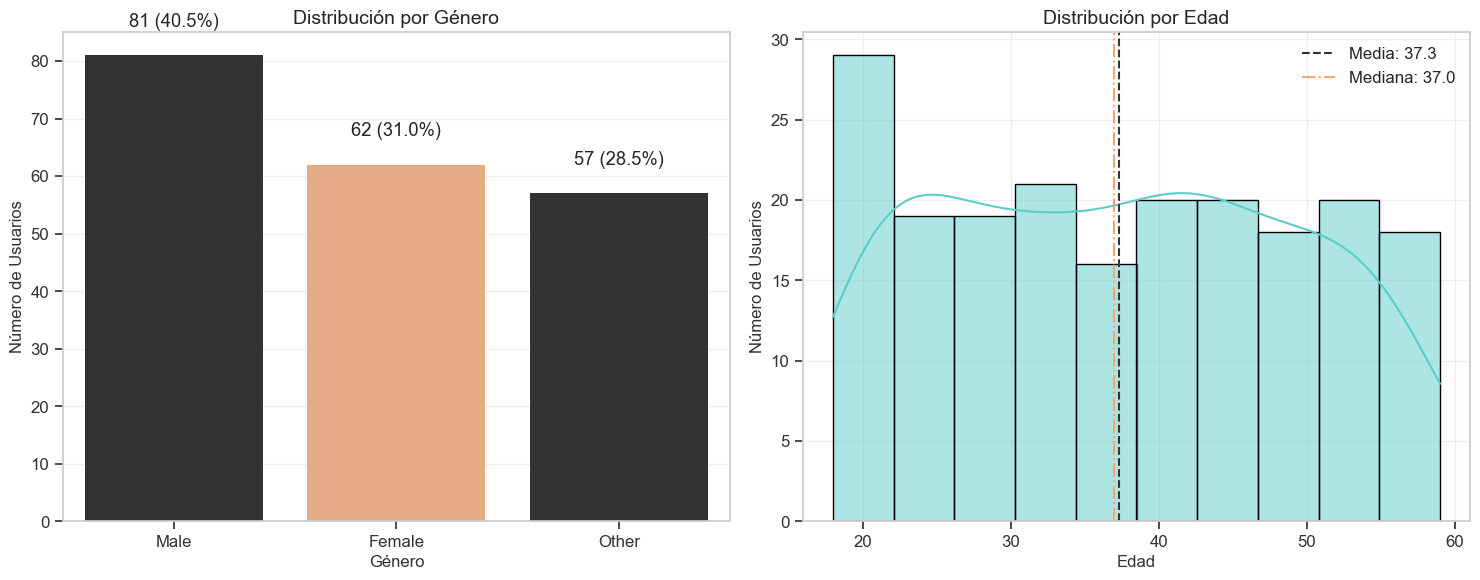

In [4]:
# Visualizaciones de la demografía de usuarios
plt.figure(figsize=(15, 6))

# Gráfico de distribución de género
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=users, palette=[COLORES_PELIPLAT['principal'], COLORES_PELIPLAT['secundario']])
plt.title('Distribución por Género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)
for i, count in enumerate(users['gender'].value_counts()):
    plt.text(i, count + 5, f'{count} ({count/len(users)*100:.1f}%)', ha='center')

# Gráfico de distribución de edad
plt.subplot(1, 2, 2)
sns.histplot(users['age'], bins=10, kde=True, color=COLORES_PELIPLAT['turquesa'])
plt.axvline(users['age'].mean(), color=COLORES_PELIPLAT['principal'], linestyle='--', 
           label=f'Media: {users["age"].mean():.1f}')
plt.axvline(users['age'].median(), color=COLORES_PELIPLAT['secundario'], linestyle='-.',
           label=f'Mediana: {users["age"].median():.1f}')
plt.title('Distribución por Edad', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)
plt.legend()

plt.tight_layout()
guardar_figura(plt.gcf(), 'distribucion_demografica_usuarios.png')
plt.show()

In [5]:
# Análisis de correlación entre género y CONSUMO de contenido
print("ANÁLISIS DE CORRELACIÓN ENTRE GÉNERO Y CONSUMO DE CONTENIDO\n")
print("=" * 60)

# Unir datos de usuarios con engagement (consumo)
user_engagement = users.merge(engagement, on='user_id', how='inner')

# Unir con contenido para obtener tipo y categoría
user_content_engagement = user_engagement.merge(content, on='content_id', how='inner')

# Calcular distribución de tipo de contenido CONSUMIDO por género
print("\nDistribución de tipo de contenido CONSUMIDO por género:")
tipo_por_genero = pd.crosstab(
    user_content_engagement['gender'], 
    user_content_engagement['type'],
    normalize='index'
) * 100
mostrar_tabla(tipo_por_genero.round(1))

# Calcular distribución de categoría de contenido CONSUMIDO por género
print("\nDistribución de categoría de contenido CONSUMIDO por género:")
categoria_por_genero = pd.crosstab(
    user_content_engagement['gender'], 
    user_content_engagement['category'],
    normalize='index'
) * 100
mostrar_tabla(categoria_por_genero.round(1))

# Prueba de chi-cuadrado para independencia entre género y tipo de contenido CONSUMIDO
contingencia_tipo = pd.crosstab(user_content_engagement['gender'], user_content_engagement['type'])
chi2_tipo, p_tipo, _, _ = stats.chi2_contingency(contingencia_tipo)
print(f"\nPrueba Chi-cuadrado para Género vs Tipo de Contenido CONSUMIDO:")
print(f"Chi2: {chi2_tipo:.2f}, p-valor: {p_tipo:.4f}")
print(f"Interpretación: {'Asociación significativa (p<0.05)' if p_tipo < 0.05 else 'No hay asociación significativa (p>0.05)'}")

# Prueba de chi-cuadrado para independencia entre género y categoría de contenido CONSUMIDO
contingencia_cat = pd.crosstab(user_content_engagement['gender'], user_content_engagement['category'])
chi2_cat, p_cat, _, _ = stats.chi2_contingency(contingencia_cat)
print(f"\nPrueba Chi-cuadrado para Género vs Categoría de Contenido CONSUMIDO:")
print(f"Chi2: {chi2_cat:.2f}, p-valor: {p_cat:.4f}")
print(f"Interpretación: {'Asociación significativa (p<0.05)' if p_cat < 0.05 else 'No hay asociación significativa (p>0.05)'}")

ANÁLISIS DE CORRELACIÓN ENTRE GÉNERO Y CONSUMO DE CONTENIDO


Distribución de tipo de contenido CONSUMIDO por género:


type,Artículo,Lista,Video
gender,,,
Female,34.60,32.70,32.70
Male,31.00,32.00,36.90
Other,36.10,32.30,31.60



Distribución de categoría de contenido CONSUMIDO por género:


category,Clásicos,Documental,Indie,Mainstream
gender,,,,
Female,26.50,17.90,27.20,28.40
Male,33.00,20.20,28.10,18.70
Other,30.10,20.30,21.80,27.80



Prueba Chi-cuadrado para Género vs Tipo de Contenido CONSUMIDO:
Chi2: 1.52, p-valor: 0.8227
Interpretación: No hay asociación significativa (p>0.05)

Prueba Chi-cuadrado para Género vs Categoría de Contenido CONSUMIDO:
Chi2: 7.27, p-valor: 0.2967
Interpretación: No hay asociación significativa (p>0.05)


In [6]:
# Análisis de correlación entre edad y consumo de contenido
print("ANÁLISIS DE CORRELACIÓN ENTRE EDAD Y CONSUMO DE CONTENIDO\n")
print("=" * 60)

# Calcular edad promedio por tipo de contenido consumido
print("\nEdad promedio por tipo de contenido consumido:")
edad_por_tipo = user_content_engagement.groupby('type')['age'].agg(['mean', 'median', 'std', 'count']).round(1)
mostrar_tabla(edad_por_tipo)

# Prueba ANOVA para diferencias en edad entre tipos de contenido consumido
grupos_edad_por_tipo = [group['age'] for name, group in user_content_engagement.groupby('type')]
f_tipo, p_tipo = stats.f_oneway(*grupos_edad_por_tipo)
print(f"\nPrueba ANOVA para diferencias de edad entre tipos de contenido consumido:")
print(f"Estadístico F: {f_tipo:.2f}, p-valor: {p_tipo:.4f}")
print(f"Interpretación: {'Diferencias significativas (p<0.05)' if p_tipo < 0.05 else 'No hay diferencias significativas (p>0.05)'}")

# Calcular edad promedio por categoría de contenido consumido
print("\nEdad promedio por categoría de contenido consumido:")
edad_por_categoria = user_content_engagement.groupby('category')['age'].agg(['mean', 'median', 'std', 'count']).round(1)
mostrar_tabla(edad_por_categoria)

# Prueba ANOVA para diferencias en edad entre categorías de contenido consumido
grupos_edad_por_categoria = [group['age'] for name, group in user_content_engagement.groupby('category')]
f_cat, p_cat = stats.f_oneway(*grupos_edad_por_categoria)
print(f"\nPrueba ANOVA para diferencias de edad entre categorías de contenido consumido:")
print(f"Estadístico F: {f_cat:.2f}, p-valor: {p_cat:.4f}")
print(f"Interpretación: {'Diferencias significativas (p<0.05)' if p_cat < 0.05 else 'No hay diferencias significativas (p>0.05)'}")

# Analizar por grupos de edad (más intuitivo que usar la edad continua)
print("\nDistribución de tipo de contenido por grupo de edad:")
tipo_por_grupo_edad = pd.crosstab(
    user_content_engagement['grupo_edad'], 
    user_content_engagement['type'],
    normalize='index'
) * 100
mostrar_tabla(tipo_por_grupo_edad.round(1))

print("\nDistribución de categoría de contenido por grupo de edad:")
categoria_por_grupo_edad = pd.crosstab(
    user_content_engagement['grupo_edad'], 
    user_content_engagement['category'],
    normalize='index'
) * 100
mostrar_tabla(categoria_por_grupo_edad.round(1))

# Pruebas chi-cuadrado para verificar asociación entre grupo de edad y contenido consumido
contingencia_tipo_edad = pd.crosstab(user_content_engagement['grupo_edad'], user_content_engagement['type'])
chi2_tipo_edad, p_tipo_edad, _, _ = stats.chi2_contingency(contingencia_tipo_edad)
print(f"\nPrueba Chi-cuadrado para Grupo de Edad vs Tipo de Contenido:")
print(f"Chi2: {chi2_tipo_edad:.2f}, p-valor: {p_tipo_edad:.4f}")
print(f"Interpretación: {'Asociación significativa (p<0.05)' if p_tipo_edad < 0.05 else 'No hay asociación significativa (p>0.05)'}")

contingencia_cat_edad = pd.crosstab(user_content_engagement['grupo_edad'], user_content_engagement['category'])
chi2_cat_edad, p_cat_edad, _, _ = stats.chi2_contingency(contingencia_cat_edad)
print(f"\nPrueba Chi-cuadrado para Grupo de Edad vs Categoría de Contenido:")
print(f"Chi2: {chi2_cat_edad:.2f}, p-valor: {p_cat_edad:.4f}")
print(f"Interpretación: {'Asociación significativa (p<0.05)' if p_cat_edad < 0.05 else 'No hay asociación significativa (p>0.05)'}")

ANÁLISIS DE CORRELACIÓN ENTRE EDAD Y CONSUMO DE CONTENIDO


Edad promedio por tipo de contenido consumido:


,mean,median,std,count
type,,,,
Artículo,38.00,39.00,11.00,167
Lista,36.60,35.00,12.50,161
Video,36.60,36.50,12.80,170



Prueba ANOVA para diferencias de edad entre tipos de contenido consumido:
Estadístico F: 0.70, p-valor: 0.4977
Interpretación: No hay diferencias significativas (p>0.05)

Edad promedio por categoría de contenido consumido:


,mean,median,std,count
category,,,,
Clásicos,37.50,37.00,12.20,150
Documental,35.00,34.00,11.50,97
Indie,37.80,38.50,11.80,130
Mainstream,37.30,36.00,12.80,121



Prueba ANOVA para diferencias de edad entre categorías de contenido consumido:
Estadístico F: 1.15, p-valor: 0.3290
Interpretación: No hay diferencias significativas (p>0.05)

Distribución de tipo de contenido por grupo de edad:


type,Artículo,Lista,Video
grupo_edad,,,
18-24,22.90,34.90,42.20
25-34,35.00,34.20,30.80
35-44,43.90,26.80,29.30
45-54,35.50,32.70,31.80
55-64,21.40,35.70,42.90



Distribución de categoría de contenido por grupo de edad:


category,Clásicos,Documental,Indie,Mainstream
grupo_edad,,,,
18-24,25.70,25.70,23.90,24.80
25-34,34.20,17.90,23.10,24.80
35-44,30.10,20.30,30.90,18.70
45-54,28.00,18.70,24.30,29.00
55-64,35.70,7.10,31.00,26.20



Prueba Chi-cuadrado para Grupo de Edad vs Tipo de Contenido:
Chi2: 15.71, p-valor: 0.0467
Interpretación: Asociación significativa (p<0.05)

Prueba Chi-cuadrado para Grupo de Edad vs Categoría de Contenido:
Chi2: 12.45, p-valor: 0.4102
Interpretación: No hay asociación significativa (p>0.05)
